In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import missingno as msno
import matplotlib.ticker as mticker
import os
import re

# Grafikler için
%matplotlib inline

# Grafik stili
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [ ]:
# Veri seti
file_path = 'C:\\Users\\uesev\\Desktop\\Utku\\Talent_Academy_Case_DT_2025.xlsx' # Dosya yolunu doğru olmalı
df = pd.read_excel(file_path)

# İlk 5 gözlem
print("İlk 5 Gözlem:")
display(df.head())

# Veri setinin boyutunu ve genel bilgileri
print(f"\nVeri Seti Şekli: {df.shape}") 
print("\nVeri Seti Bilgisi:")
print(df.info())

# Sayısal sütunların istatistiksel özeti
print("\nSayısal Değişkenlerin İstatistikleri:")
display(df.describe())

# Kategorik sütunların istatistiksel özeti
print("\nKategorik Değişkenlerin İstatistikleri:")
display(df.describe(include=['object']))

""

İlk 5 Gözlem:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika



Veri Seti Şekli: (2235, 13)

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
None

Sayısal Değişkenlerin İstatistikleri:


,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000



Kategorik Değişkenlerin İstatistikleri:


,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
count,2066,1560,2235,1624,2224,1291,2160,2235,2235,2014,2235
unique,2,8,5,220,10,38,367,244,23,37,10
top,Kadın,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",Dorsalji -Boyun+trapez,15 Seans,Bel,20 Dakika
freq,1274,579,2173,38,2045,198,149,231,1670,528,1535


''


Eksik veri durumu:


,Eksik Adet,Eksik Yüzde
Cinsiyet,169,7.561521
KanGrubu,675,30.201342
KronikHastalik,611,27.337808
Bolum,11,0.492170
Alerji,944,42.237136
Tanilar,75,3.355705
UygulamaYerleri,221,9.888143


C:\Users\uesev\AppData\Local\Temp\ipykernel_20612\407482781.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

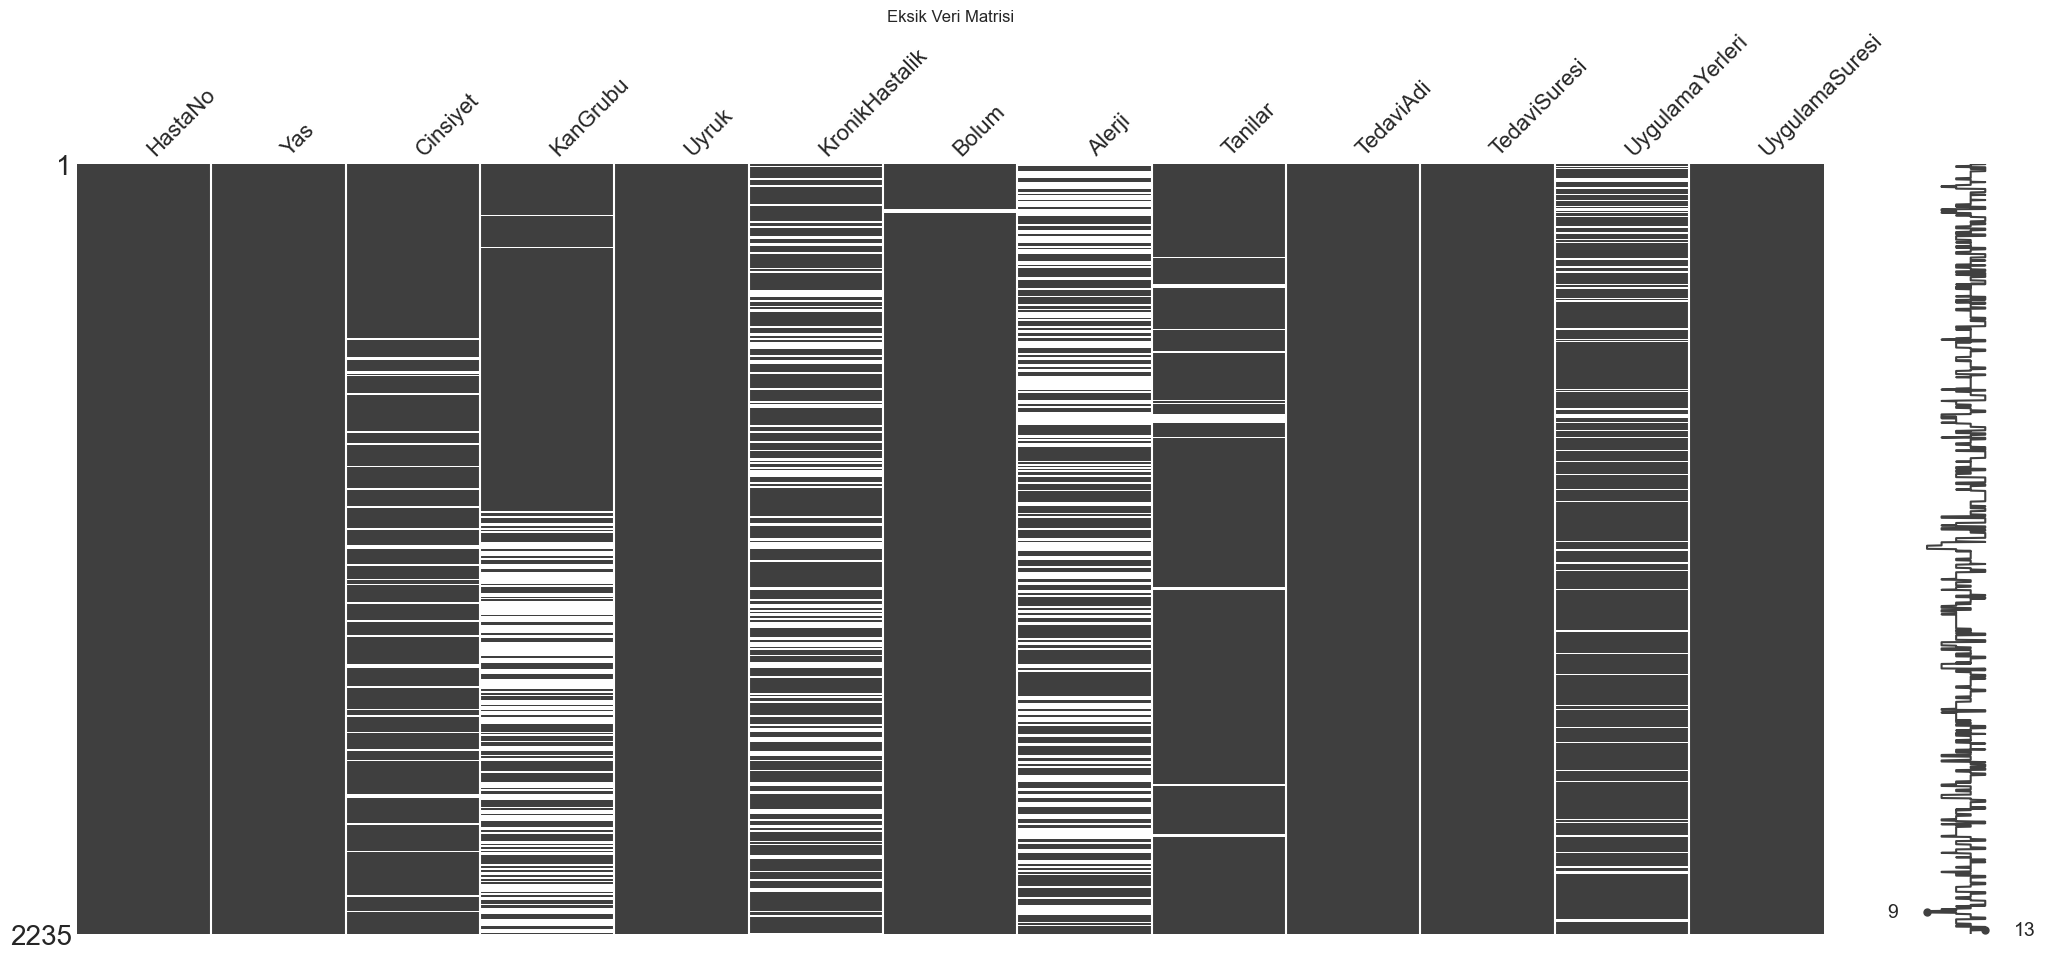

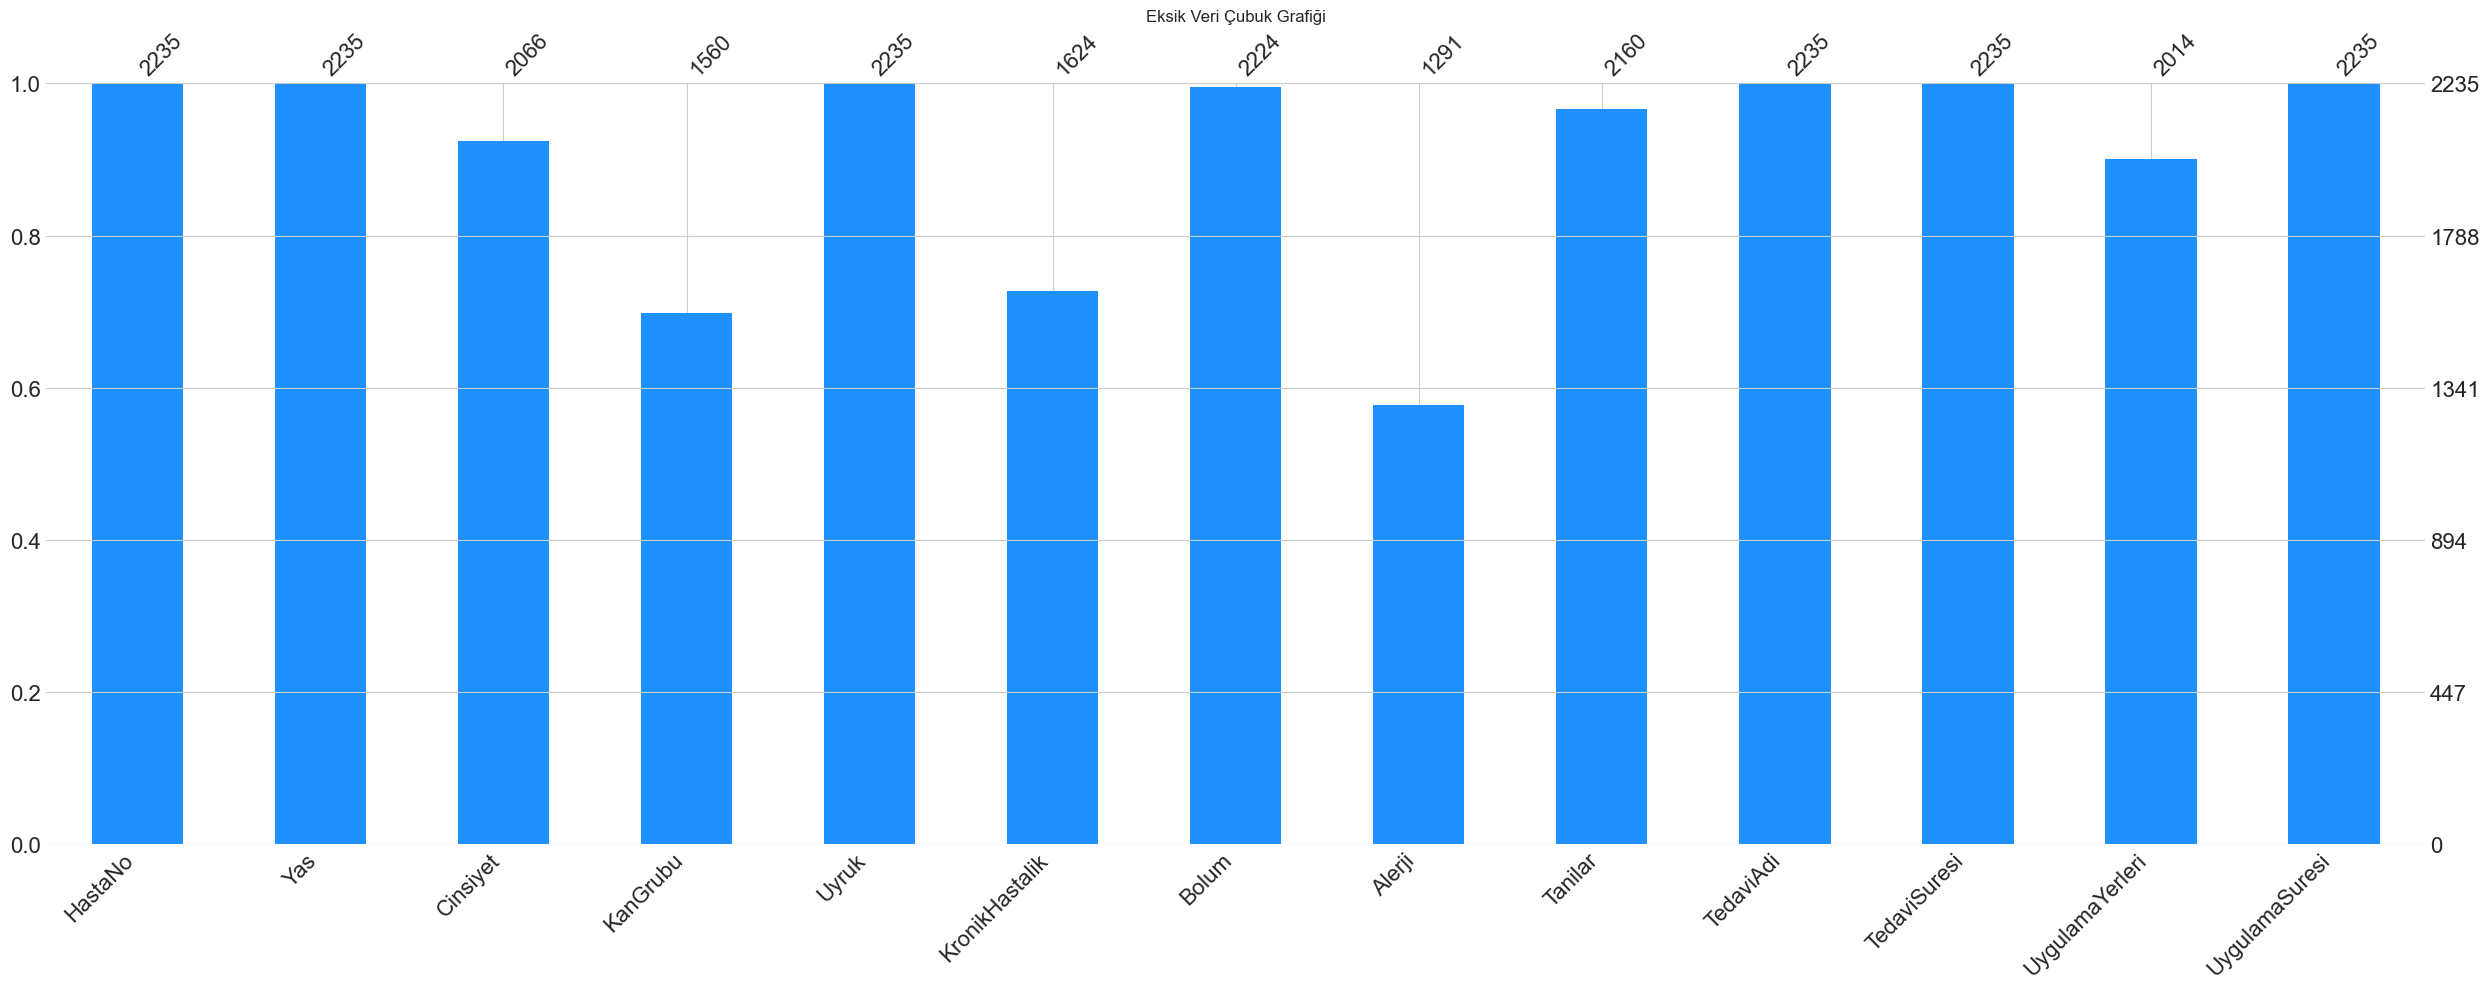

<Figure size 1200x600 with 0 Axes>

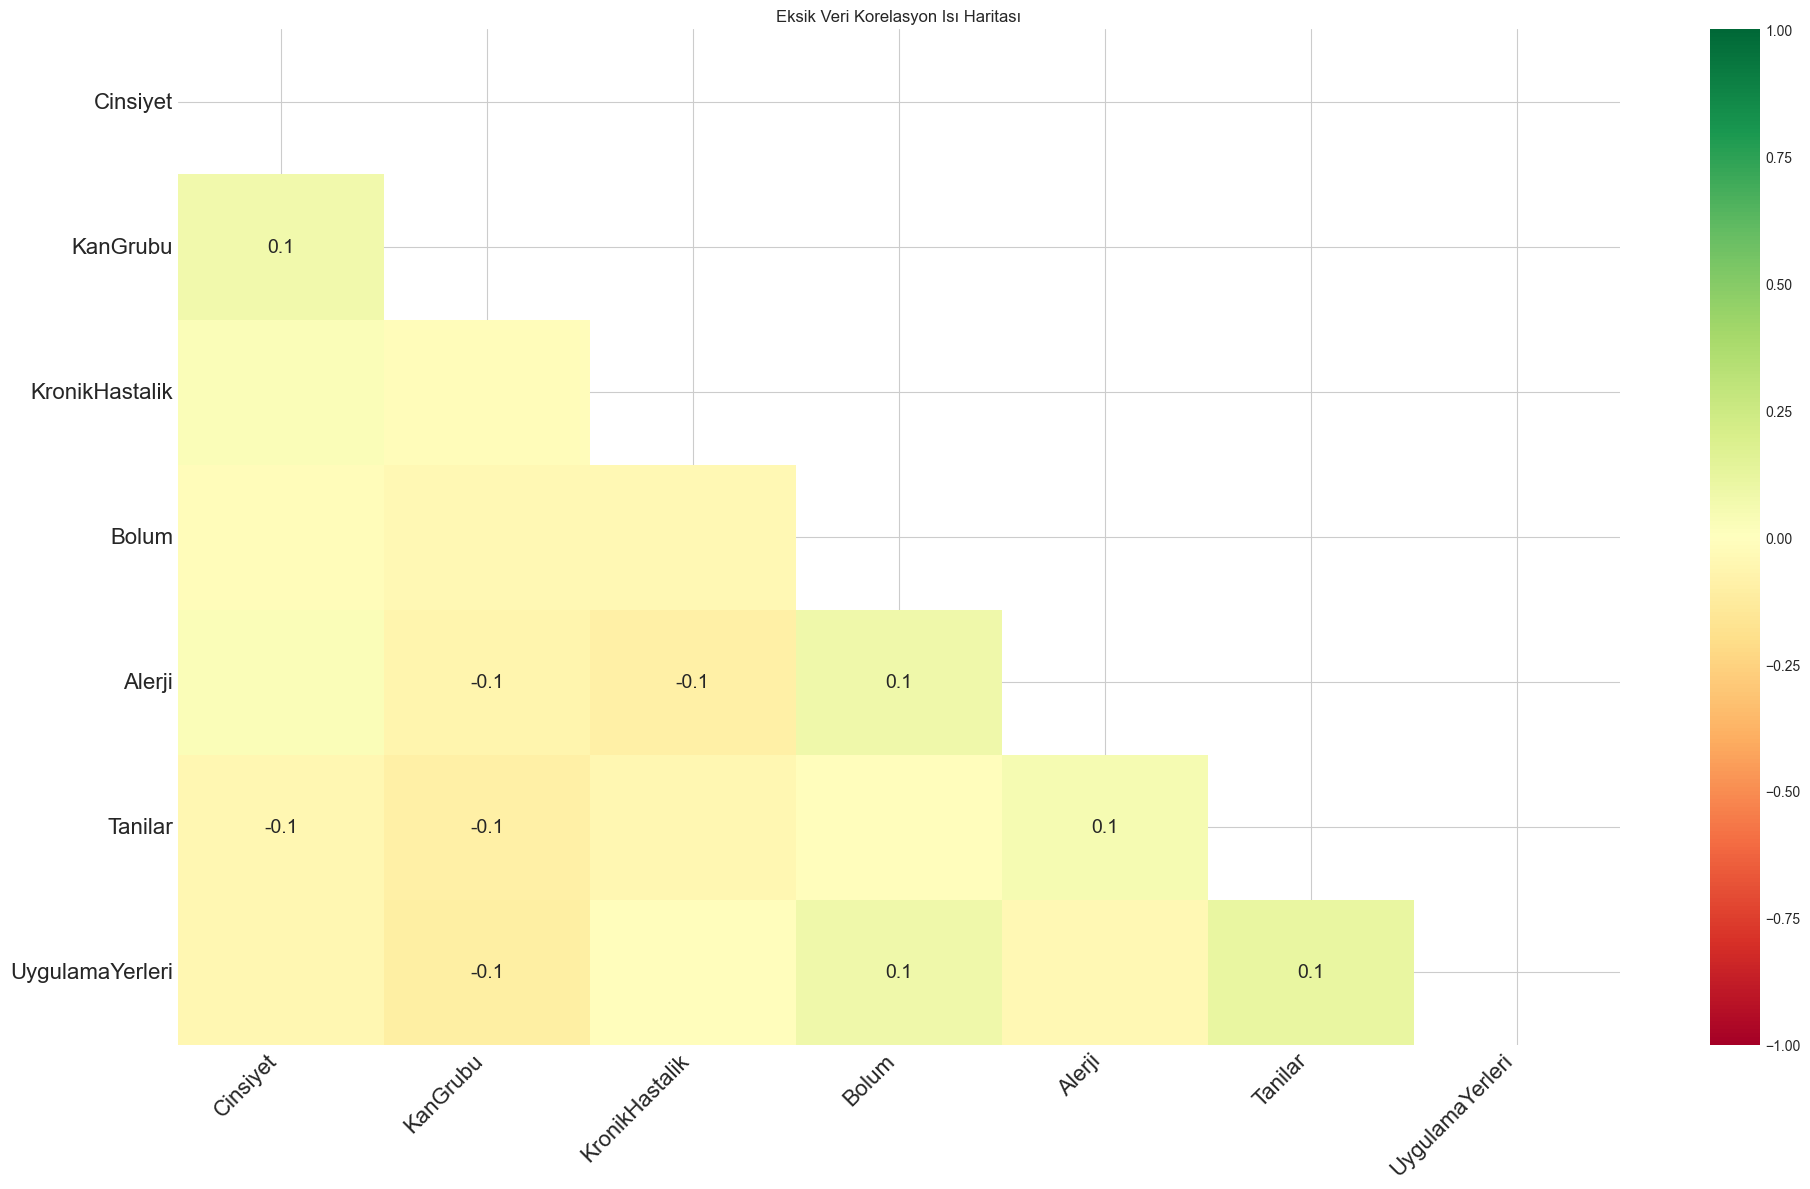

<Figure size 1200x600 with 0 Axes>

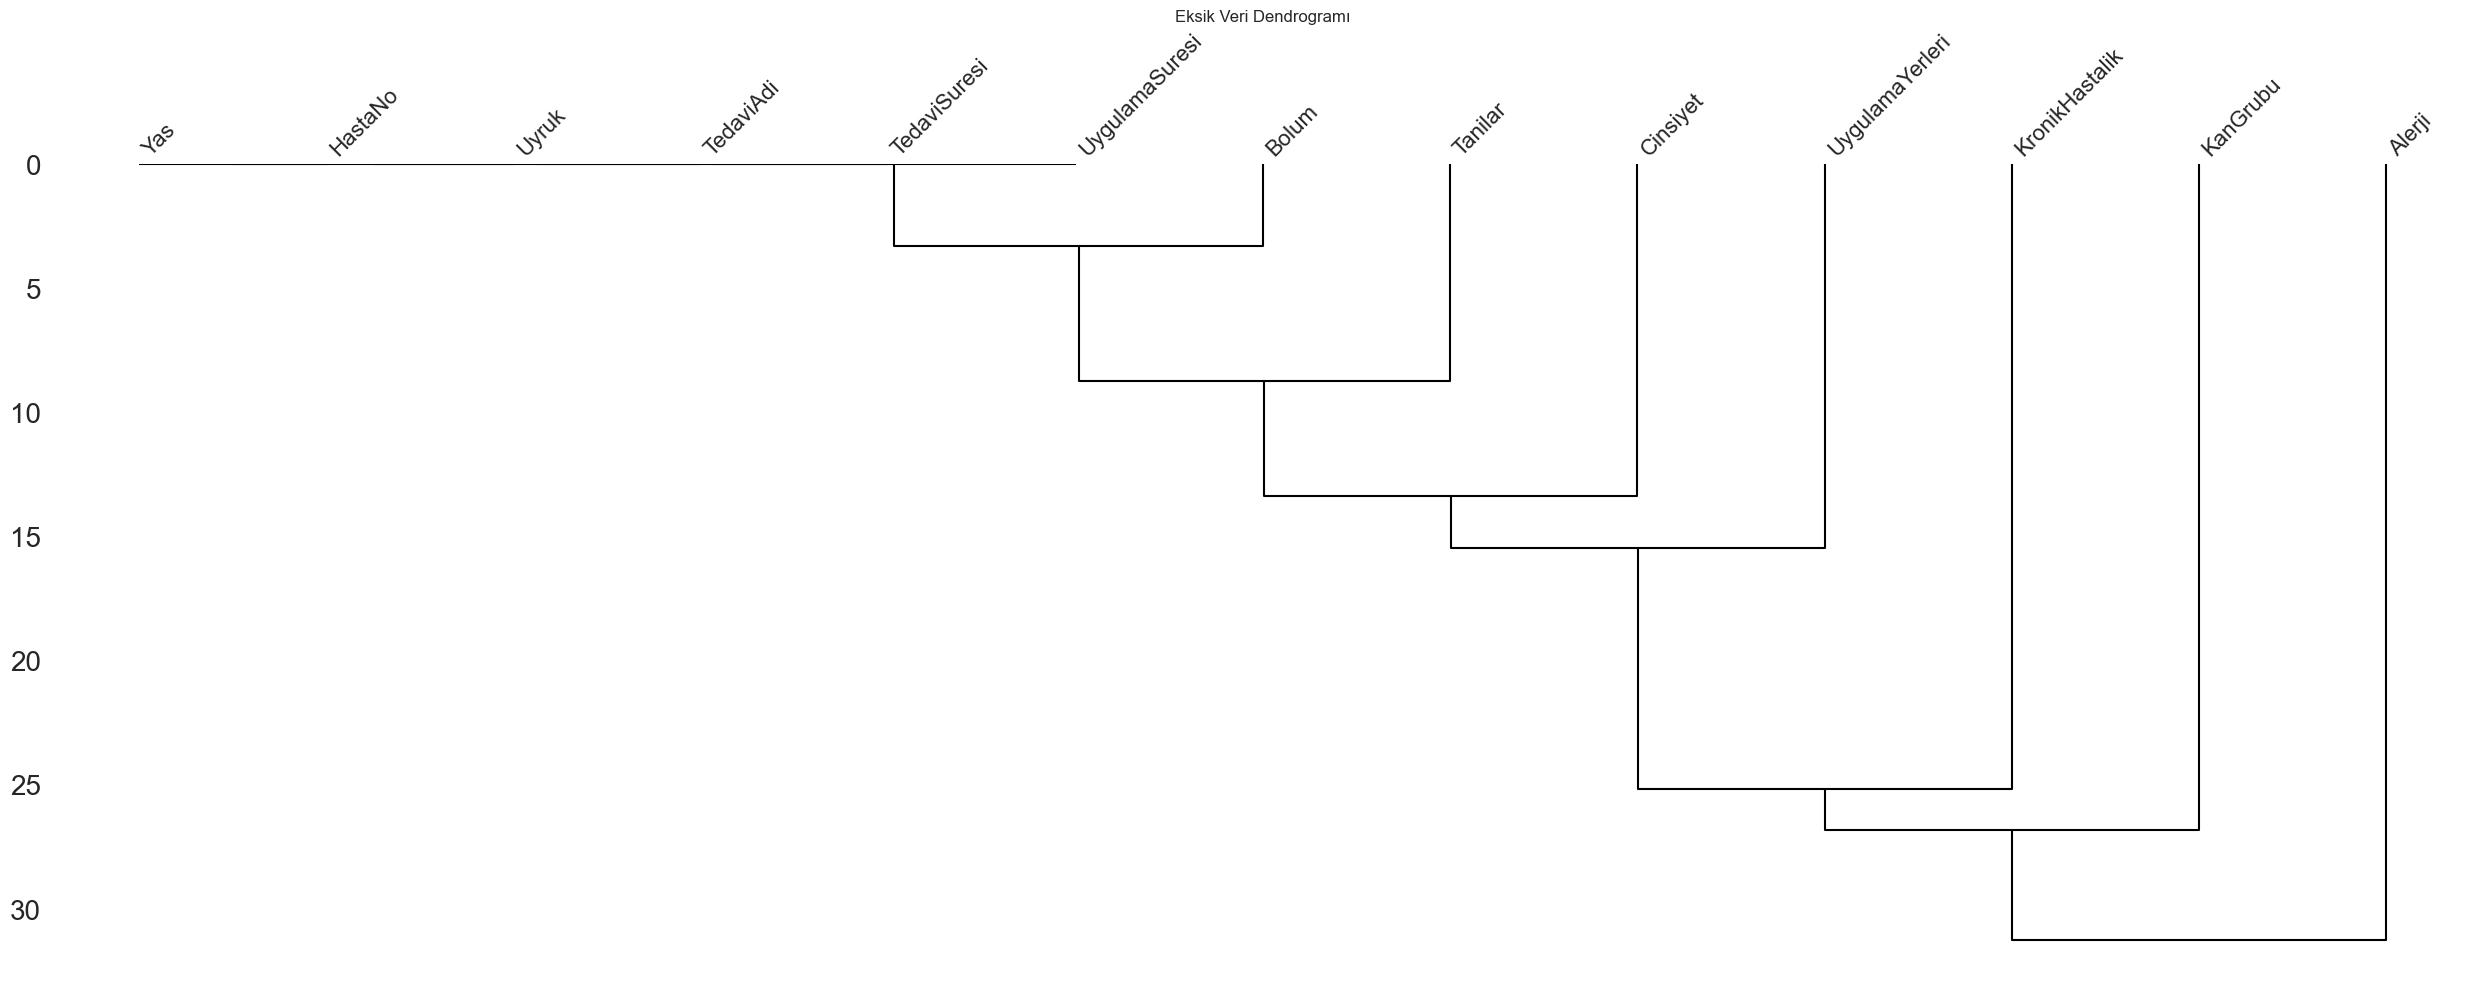

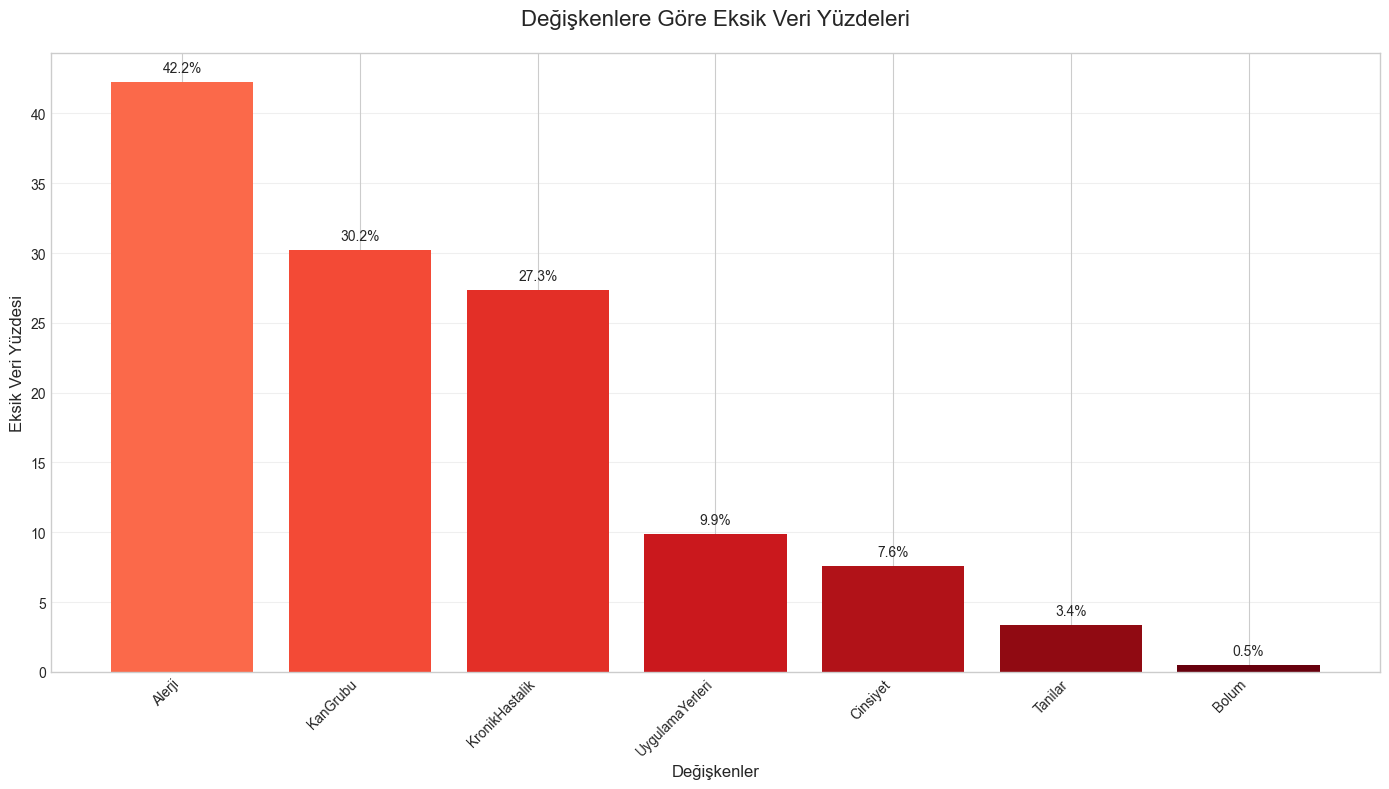

In [ ]:
print("\nEksik veri durumu:")

# Eksik veri tablosu
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({'Eksik Adet': missing_data, 'Eksik Yüzde': missing_percentage})
display(missing_table[missing_table['Eksik Adet'] > 0])

# Eksik veri matrisi
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Eksik Veri Matrisi')
plt.tight_layout()
plt.show()

# Eksik veri çubuk grafiği
plt.figure(figsize=(12, 6))
msno.bar(df, color="dodgerblue")
plt.title('Eksik Veri Çubuk Grafiği')
plt.tight_layout()
plt.show()

# Eksik veri ısı haritası (korelasyon)
plt.figure(figsize=(12, 6))
msno.heatmap(df, cmap="RdYlGn")
plt.title('Eksik Veri Korelasyon Isı Haritası')
plt.tight_layout()
plt.show()

# Eksik veri dendrogramı (benzerlik grupları)
plt.figure(figsize=(12, 6))
msno.dendrogram(df)
plt.title('Eksik Veri Dendrogramı')
plt.tight_layout()
plt.show()

# Eksik veri dağılımı için özelleştirilmiş görsel
plt.figure(figsize=(14, 8))
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(inplace=True, ascending=False)

colors = plt.cm.Reds(np.linspace(0.5, 1, len(missing_percentage)))
bars = plt.bar(range(len(missing_percentage)), missing_percentage.values, color=colors)
plt.title('Değişkenlere Göre Eksik Veri Yüzdeleri', fontsize=16, pad=20)
plt.xlabel('Değişkenler', fontsize=12)
plt.ylabel('Eksik Veri Yüzdesi', fontsize=12)
plt.xticks(range(len(missing_percentage)), missing_percentage.index, rotation=45, ha='right')

# Çubukların üzerine yüzde değerler
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

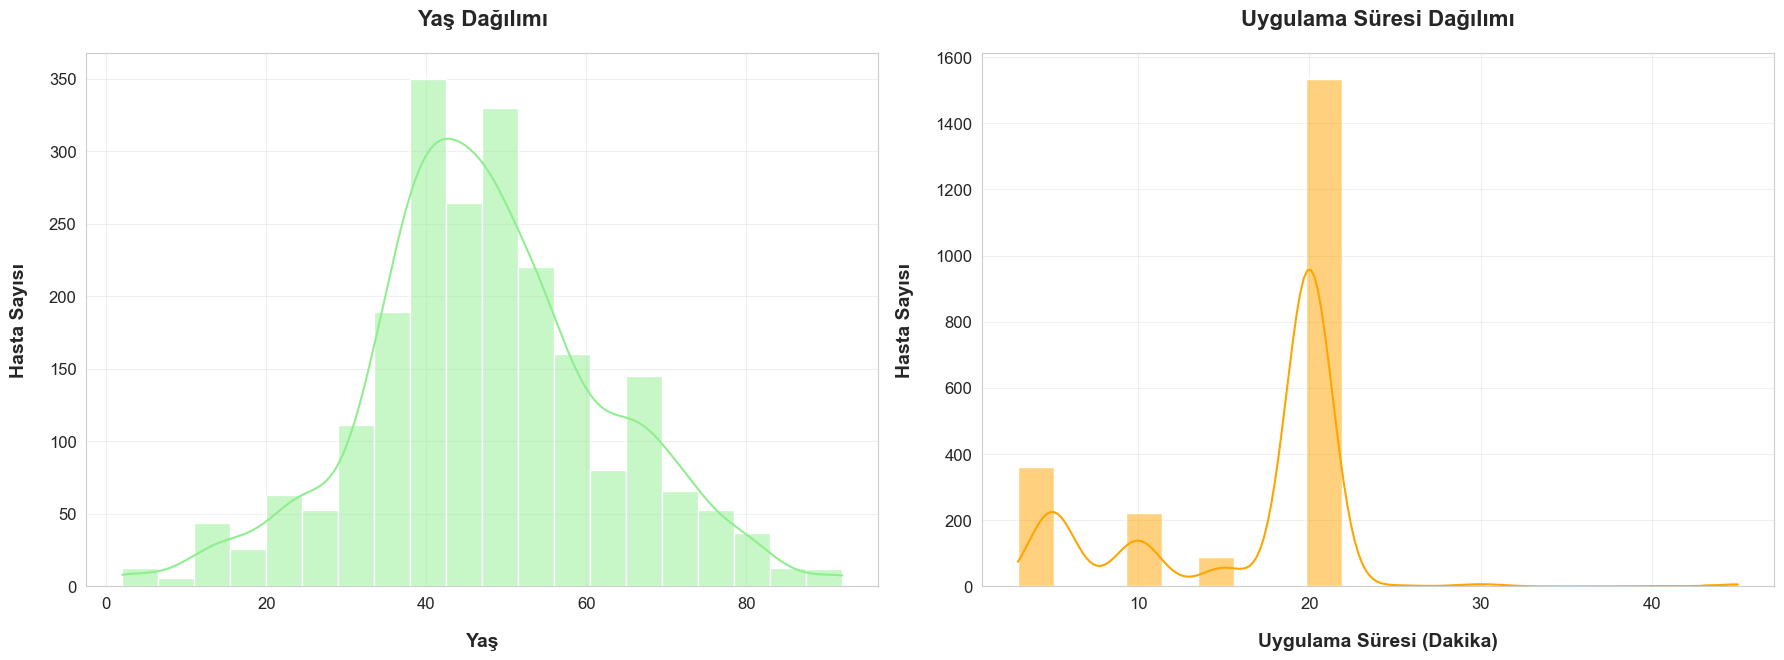

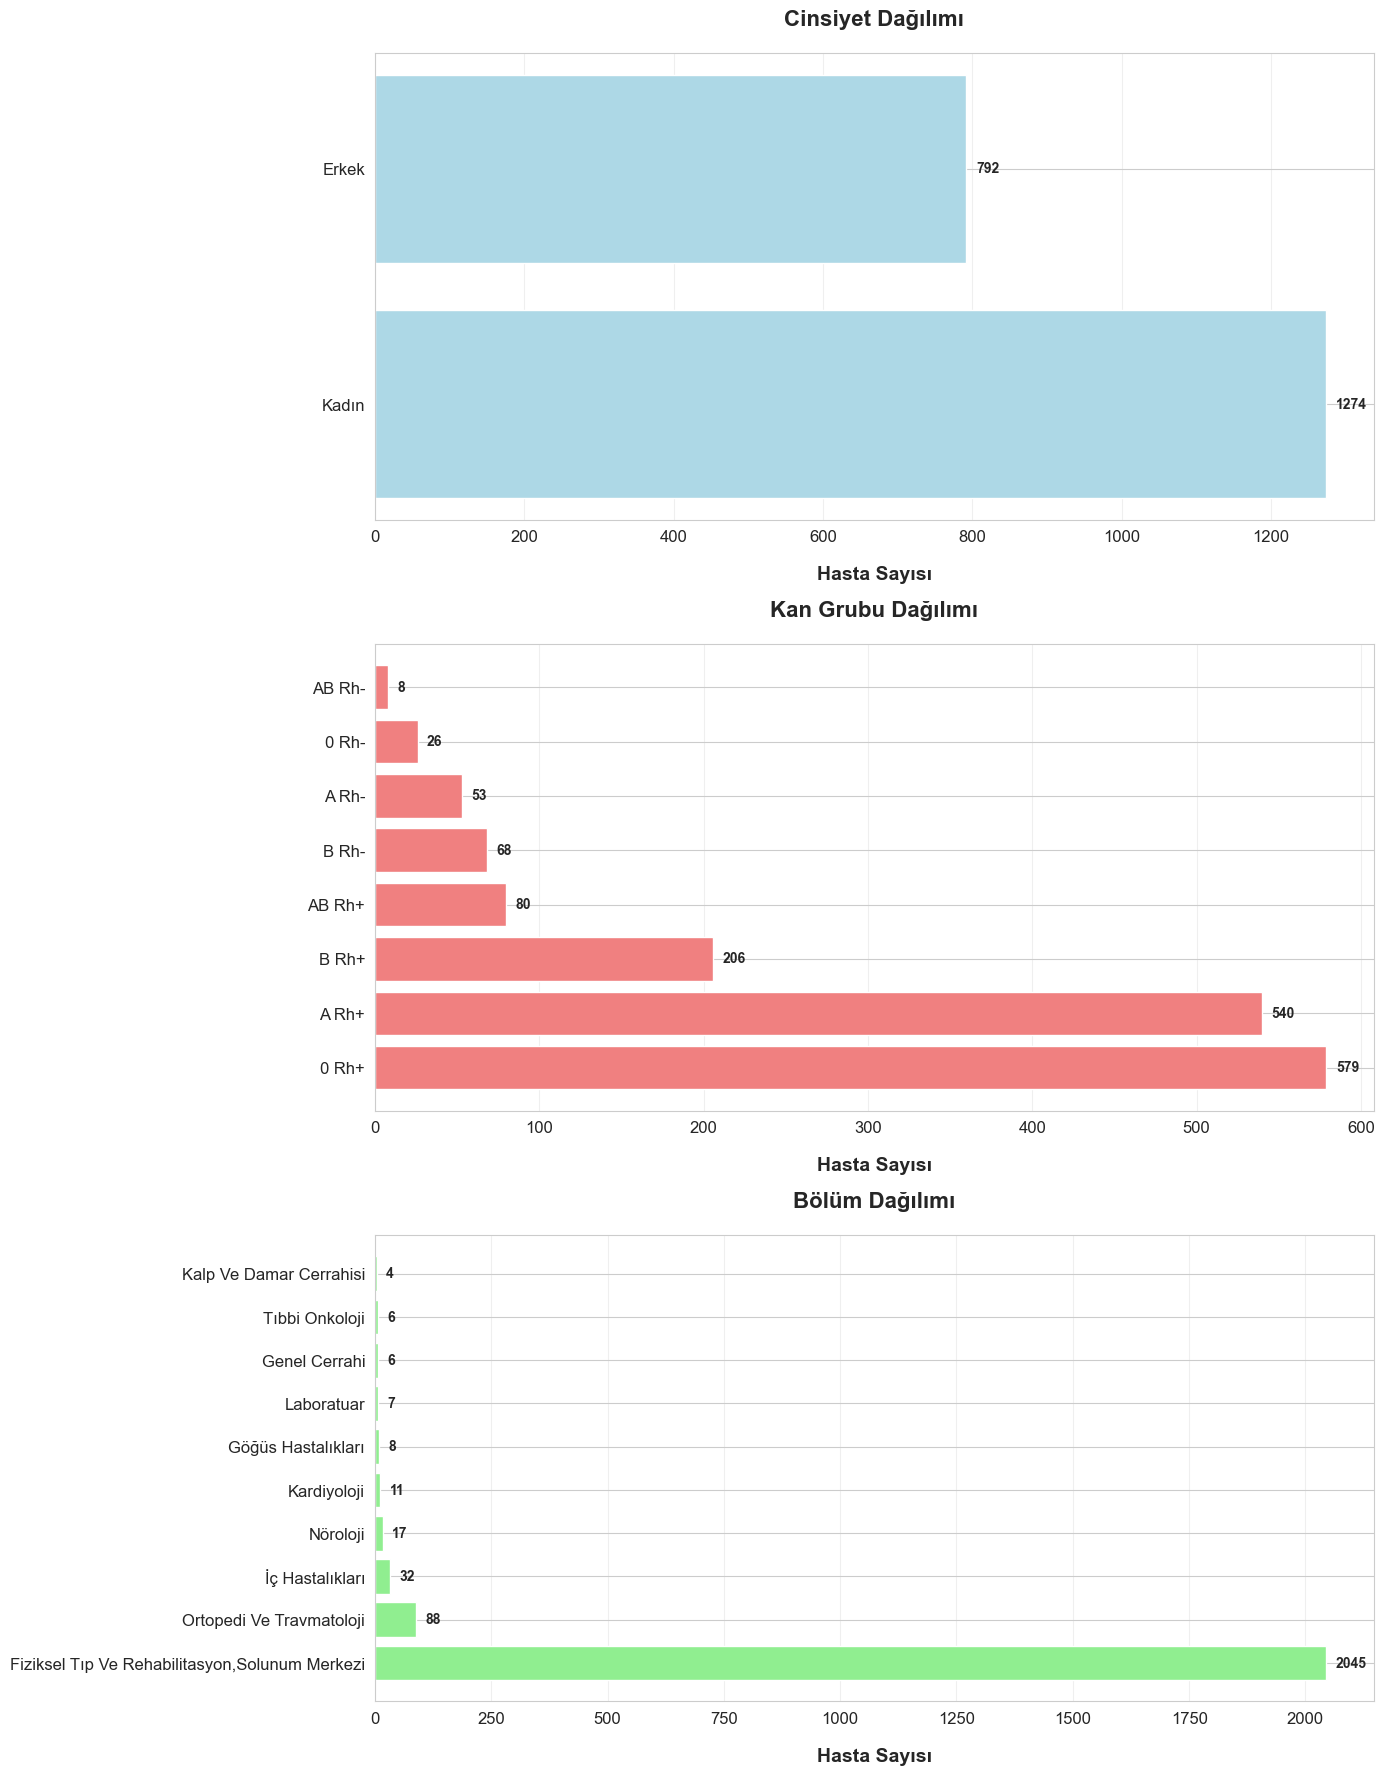

C:\Users\uesev\AppData\Local\Temp\ipykernel_20612\3755275414.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cinsiyet', y='TedaviSuresi', data=df, estimator=np.mean, ax=axes[0], ci=None, palette='pastel')
C:\Users\uesev\AppData\Local\Temp\ipykernel_20612\3755275414.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cinsiyet', y='TedaviSuresi', data=df, estimator=np.mean, ax=axes[0], ci=None, palette='pastel')
C:\Users\uesev\AppData\Local\Temp\ipykernel_20612\3755275414.py:93: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KanGrubu', y='TedaviSuresi', data=df, estimator=np.mean, ax=axes[1], ci=None, palette='pastel')
C:\Users\uesev\AppData\Local\Temp\ipykernel_20612\3755275414.py:93: FutureWarning: 

Pas

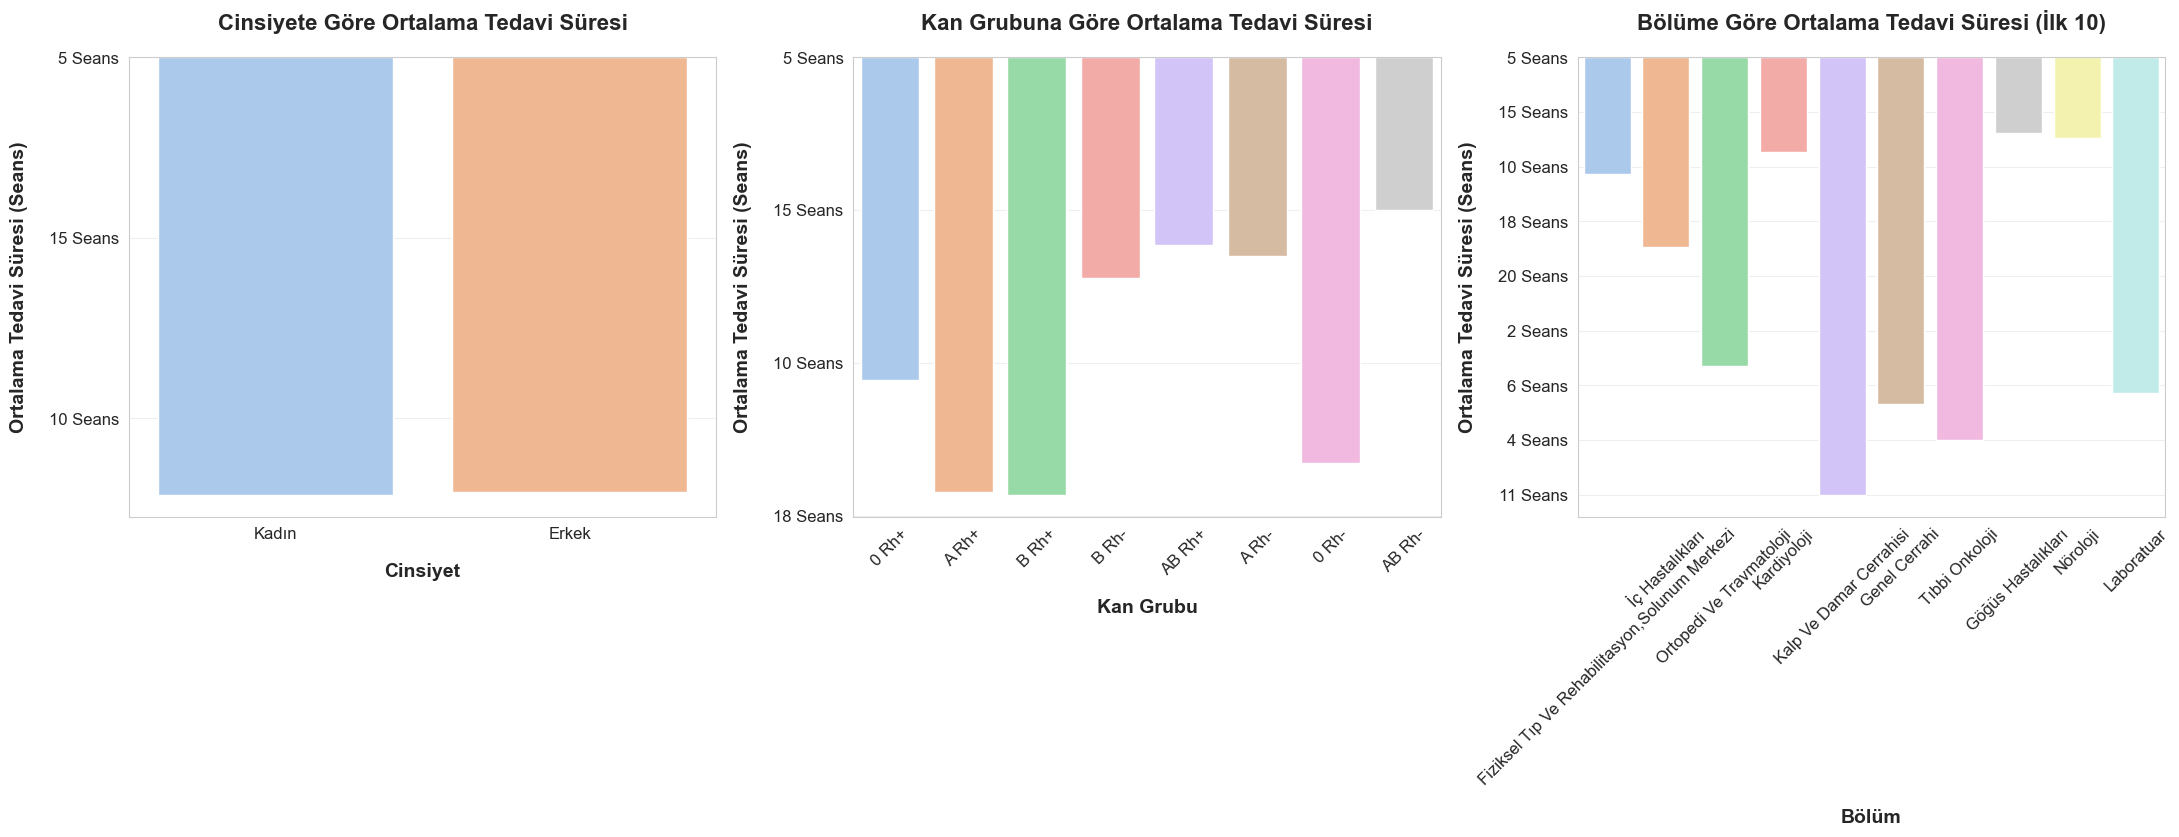

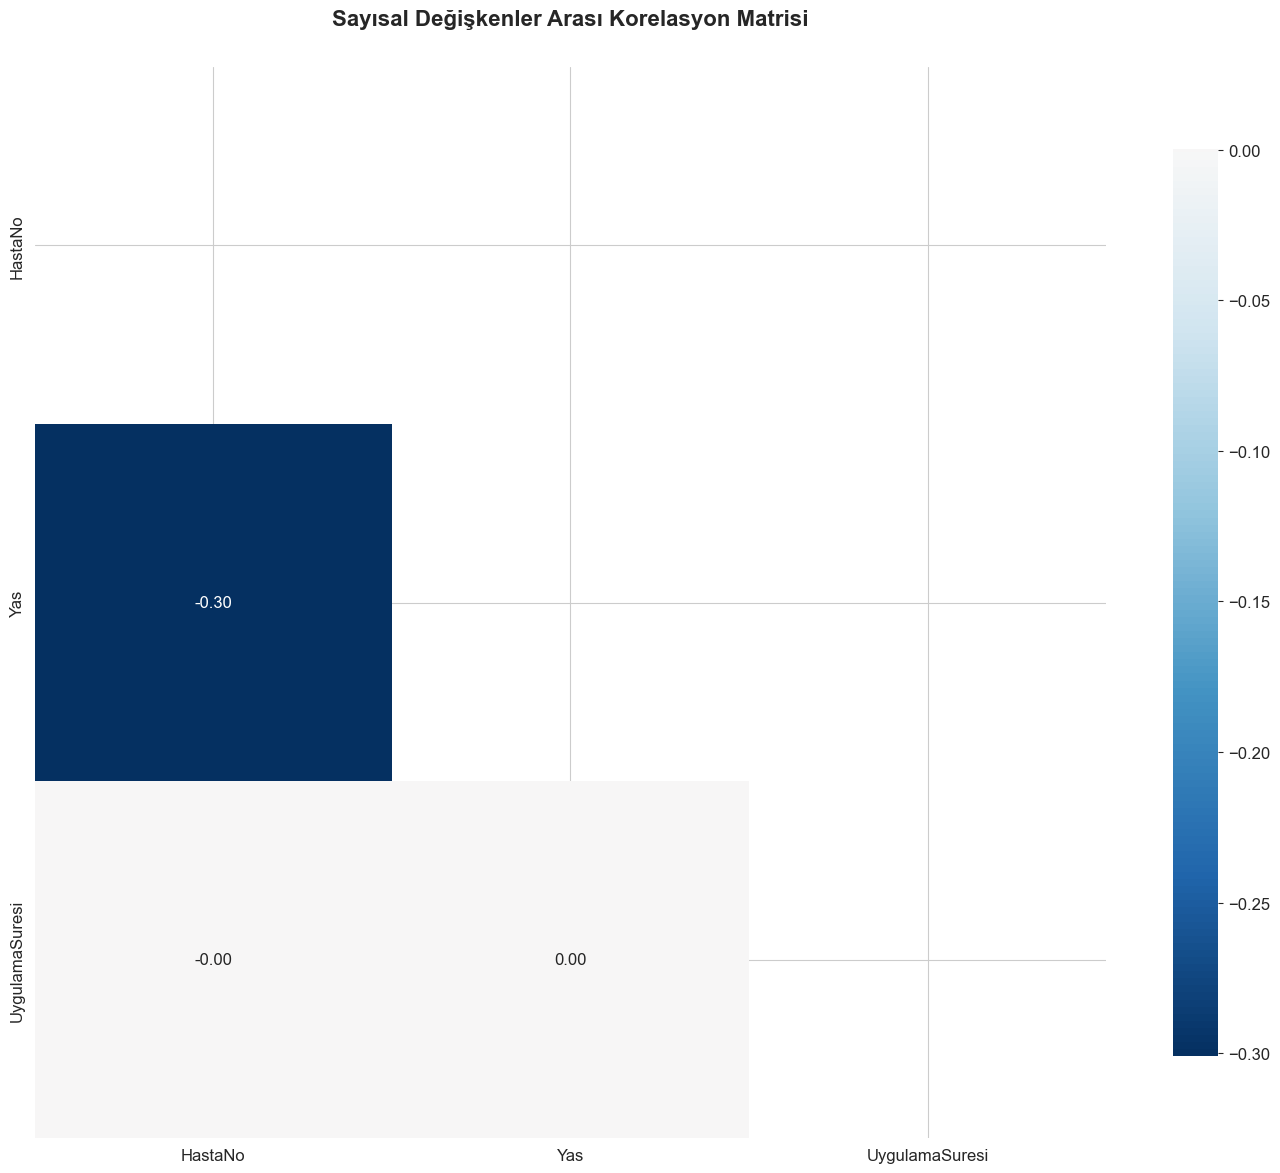

Korelasyon Matrisi:


,HastaNo,Yas,UygulamaSuresi
HastaNo,1.000000,-0.300964,-0.000413
Yas,-0.300964,1.000000,0.000244
UygulamaSuresi,-0.000413,0.000244,1.000000



=== Anomali (Outlier) Tespiti ===

📌 Yas değişkeninde 41 adet uç değer bulundu.
   Alt Limit: 11.00, Üst Limit: 83.00
   Örnek: [92, 92, 92, 92, 92]

📌 UygulamaSuresi değişkeninde 12 adet uç değer bulundu.
   Alt Limit: -5.00, Üst Limit: 35.00
   Örnek: [45.0, 45.0, 45.0, 40.0, 45.0]

=== Güçlü Korelasyonlar (|r| > 0.8) ===
Güçlü korelasyon tespit edilmedi ✅


In [ ]:
# Görselleştirme için stil ve boyut ayarları
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.dpi'] = 100  # DPI ayarı


#  Sayısal Değişkenlerin Dağılımı (Yaş ve UygulamaSuresi)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Yaş dağılımı
sns.histplot(df['Yas'], kde=True, ax=axes[0], bins=20, color='lightgreen')
axes[0].set_title('Yaş Dağılımı', pad=20)
axes[0].set_xlabel('Yaş', labelpad=15, fontsize=14, fontweight='bold')
axes[0].set_ylabel('Hasta Sayısı', labelpad=15, fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, alpha=0.3)

# UygulamaSuresi dağılımı 
if 'UygulamaSuresi' in df.columns:
    df_temp = df.copy()
    df_temp['UygulamaSuresi'] = df_temp['UygulamaSuresi'].astype(str)
    
    def extract_numeric(value):
        numbers = re.findall(r'\d+', value)
        return float(numbers[0]) if numbers else np.nan
    
    df_temp['UygulamaSuresi_Numeric'] = df_temp['UygulamaSuresi'].apply(extract_numeric)
    
    sns.histplot(df_temp['UygulamaSuresi_Numeric'].dropna(), kde=True, ax=axes[1], bins=20, color='orange')
    axes[1].set_title('Uygulama Süresi Dağılımı', pad=20)
    axes[1].set_xlabel('Uygulama Süresi (Dakika)', labelpad=15, fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Hasta Sayısı', labelpad=15, fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', labelsize=12)
    axes[1].tick_params(axis='y', labelsize=12)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  
plt.show()

# 3. Kategorik Değişkenlerin Frekansları (Cinsiyet, KanGrubu, Bolum)
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

kategorik_degiskenler = ['Cinsiyet', 'KanGrubu', 'Bolum']
titles = ['Cinsiyet Dağılımı', 'Kan Grubu Dağılımı', 'Bölüm Dağılımı']
colors = ['lightblue', 'lightcoral', 'lightgreen']

for i, (degisken, title, color) in enumerate(zip(kategorik_degiskenler, titles, colors)):
    if degisken in df.columns:
        value_counts = df[degisken].value_counts()
        
        bars = axes[i].barh(range(len(value_counts)), value_counts.values, color=color)
        axes[i].set_yticks(range(len(value_counts)))
        axes[i].set_yticklabels(value_counts.index, fontsize=12)
        axes[i].set_title(title, pad=20)
        axes[i].set_xlabel('Hasta Sayısı', labelpad=15, fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].grid(True, alpha=0.3, axis='x')
        
        for j, bar in enumerate(bars):
            width = bar.get_width()
            axes[i].text(width + (max(value_counts.values) * 0.01), bar.get_y() + bar.get_height()/2,
                        f'{width}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)  

# Hedef Değişkenin Kategorik Değişkenlere Göre Dağılımı
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Cinsiyete göre ortalama tedavi süresi
if 'Cinsiyet' in df.columns:
    sns.barplot(x='Cinsiyet', y='TedaviSuresi', data=df, estimator=np.mean, ax=axes[0], ci=None, palette='pastel')
    axes[0].set_title('Cinsiyete Göre Ortalama Tedavi Süresi', pad=20)
    axes[0].set_xlabel('Cinsiyet', labelpad=15, fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Ortalama Tedavi Süresi (Seans)', labelpad=15, fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', labelsize=12)
    axes[0].tick_params(axis='y', labelsize=12)
    axes[0].grid(True, alpha=0.3, axis='y')

# Kan grubuna göre ortalama tedavi süresi
if 'KanGrubu' in df.columns:
    sns.barplot(x='KanGrubu', y='TedaviSuresi', data=df, estimator=np.mean, ax=axes[1], ci=None, palette='pastel')
    axes[1].set_title('Kan Grubuna Göre Ortalama Tedavi Süresi', pad=20)
    axes[1].set_xlabel('Kan Grubu', labelpad=15, fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Ortalama Tedavi Süresi (Seans)', labelpad=15, fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', labelsize=12, rotation=45)
    axes[1].tick_params(axis='y', labelsize=12)
    axes[1].grid(True, alpha=0.3, axis='y')

# Bölüme göre ortalama tedavi süresi
if 'Bolum' in df.columns:
    # En fazla gözleme sahip ilk 10 bölümü alalım
    top_bolumler = df['Bolum'].value_counts().nlargest(10).index
    df_top_bolum = df[df['Bolum'].isin(top_bolumler)]
    
    sns.barplot(x='Bolum', y='TedaviSuresi', data=df_top_bolum, estimator=np.mean, ax=axes[2], ci=None, palette='pastel')
    axes[2].set_title('Bölüme Göre Ortalama Tedavi Süresi (İlk 10)', pad=20)
    axes[2].set_xlabel('Bölüm', labelpad=15, fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Ortalama Tedavi Süresi (Seans)', labelpad=15, fontsize=14, fontweight='bold')
    axes[2].tick_params(axis='x', labelsize=12, rotation=45)
    axes[2].tick_params(axis='y', labelsize=12)
    axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Alt kısımda daha fazla boşluk bırak
plt.show()

# Korelasyon Matrisi 
numeric_df = df.select_dtypes(include=[np.number]).copy()

if 'UygulamaSuresi' in df.columns and 'UygulamaSuresi' not in numeric_df.columns:
    numeric_df['UygulamaSuresi'] = df['UygulamaSuresi'].astype(str).apply(extract_numeric)

if not numeric_df.empty:
    plt.figure(figsize=(14, 12))
    
    # Korelasyon matrisi
    corr_matrix = numeric_df.corr()
    
    # Isı haritası 
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
    heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
                         square=True, fmt='.2f', cbar_kws={"shrink": .8}, annot_kws={"size": 12})
    
    plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi', pad=30, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("Korelasyon Matrisi:")
    display(corr_matrix)
else:
    print("Sayısal değişken bulunamadı.")
    # Anomali (Outlier) Tespiti
print("\n=== Anomali (Outlier) Tespiti ===")

outlier_summary = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)][col]
    
    if not outliers.empty:
        outlier_summary[col] = {
            "Toplam Outlier": len(outliers),
            "Alt Limit": lower_bound,
            "Üst Limit": upper_bound,
            "Örnek Outlier Değerler": outliers.head().tolist()
        }

if outlier_summary:
    for col, details in outlier_summary.items():
        print(f"\n📌 {col} değişkeninde {details['Toplam Outlier']} adet uç değer bulundu.")
        print(f"   Alt Limit: {details['Alt Limit']:.2f}, Üst Limit: {details['Üst Limit']:.2f}")
        print(f"   Örnek: {details['Örnek Outlier Değerler']}")
else:
    print("Outlier bulunmadı ✅")

# Güçlü Korelasyonların Kontrolü
print("\n=== Güçlü Korelasyonlar (|r| > 0.8) ===")
high_corr = corr_matrix[(corr_matrix.abs() > 0.8) & (corr_matrix.abs() < 1.0)]

if (high_corr.notna().sum().sum()) > 0:
    display(high_corr.dropna(how='all').dropna(axis=1, how='all'))
else:
    print("Güçlü korelasyon tespit edilmedi ✅")


In [ ]:
# Orijinal veri setinin bir kopyası
df_clean = df.copy()

"""
1. EKSİK VERİLERİ DOLDURMA
"""
# Kategorik Sütunlar için
kategorik_sutunlar = ['KronikHastalik', 'Alerji', 'Uyruk']
for sutun in kategorik_sutunlar:
    if sutun in df_clean.columns:
        df_clean[sutun] = df_clean[sutun].fillna('Bilgi_Yok')

# Sayısal Sütunlar için
if df_clean['Yas'].isnull().sum() > 0:
    yas_imputer = SimpleImputer(strategy='mean')
    df_clean['Yas'] = yas_imputer.fit_transform(df_clean[['Yas']])

"""
2. UYGULAMASURESİ SÜTUNUNU İŞLEME
"""
# 'UygulamaSuresi' sütunundaki metin değerlerini sayısala dönüştür
if 'UygulamaSuresi' in df_clean.columns:
    # Önce tüm değerleri string'e çevir
    df_clean['UygulamaSuresi'] = df_clean['UygulamaSuresi'].astype(str)
    
    # Sayısal değerleri çıkarmak için regex kullan
    def extract_numeric(value):
        # Sayısal değerleri bul
        numbers = re.findall(r'\d+', value)
        if numbers:
            return float(numbers[0])
        else:
            return np.nan
    
    # Sayısal değerleri çıkar
    df_clean['UygulamaSuresi'] = df_clean['UygulamaSuresi'].apply(extract_numeric)
    
    # Eksik değerleri ortalama ile doldur
    if df_clean['UygulamaSuresi'].isnull().sum() > 0:
        uygulama_imputer = SimpleImputer(strategy='mean')
        df_clean['UygulamaSuresi'] = uygulama_imputer.fit_transform(df_clean[['UygulamaSuresi']])

"""
3. KATEGORİK DEĞİŞKENLERİ KODLAMA (ENCODING)
"""
# Label Encoding
if 'Cinsiyet' in df_clean.columns:
    le = LabelEncoder()
    df_clean['Cinsiyet'] = le.fit_transform(df_clean['Cinsiyet'])

# One-Hot Encoding
onehot_columns = []
for col in ['KanGrubu', 'Bolum', 'Uyruk']:
    if col in df_clean.columns:
        onehot_columns.append(col)

if onehot_columns:
    df_clean = pd.get_dummies(df_clean, columns=onehot_columns, prefix=onehot_columns, drop_first=True)

"""
4. METİN SUTUNLARINI İŞLEME (KronikHastalik, Alerji, Tanilar)
"""
# Yeni özellikler oluşturma
if 'KronikHastalik' in df_clean.columns:
    df_clean['KronikHastalik_Sayisi'] = df_clean['KronikHastalik'].apply(
        lambda x: len(str(x).split(',')) if x != 'Bilgi_Yok' else 0
    )

if 'Alerji' in df_clean.columns:
    df_clean['Alerji_Var_Mi'] = df_clean['Alerji'].apply(
        lambda x: 0 if x == 'Bilgi_Yok' or str(x).lower() == 'yok' else 1
    )

# Gereksiz sütunları kaldırma
columns_to_drop = []
for col in ['KronikHastalik', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'HastaNo']:
    if col in df_clean.columns:
        columns_to_drop.append(col)

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)

    """
HEDEF DEĞİŞKENİ SAYISALA ÇEVİRME
"""
if "TedaviSuresi" in df_clean.columns:
    df_clean["TedaviSuresi"] = (
        df_clean["TedaviSuresi"]
        .astype(str)                # tüm değerleri string yap
        .str.extract(r"(\d+)")      # içindeki sayıyı al
        .astype(float)              # sayıya çevir
    )


"""
5. SAYISAL DEĞİŞKENLERİ ÖLÇEKLEME (SCALING)
"""
# Ölçeklenecek sayısal sütunları belirle
sayisal_sutunlar = []
for col in ['Yas', 'UygulamaSuresi', 'KronikHastalik_Sayisi']:
    if col in df_clean.columns:
        sayisal_sutunlar.append(col)

if sayisal_sutunlar:
    scaler = StandardScaler()
    df_clean[sayisal_sutunlar] = scaler.fit_transform(df_clean[sayisal_sutunlar])

# Son durumu kontrol et
print("Ön işleme sonrası veri seti bilgisi:")
print(df_clean.info())
print("\nİlk 5 gözlem:")
display(df_clean.head())

# Hazırlanan veriyi kaydet
df_clean.to_csv('model_ready_data.csv', index=False)
print("\nModel-ready veri 'model_ready_data.csv' olarak kaydedildi!")

Ön işleme sonrası veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Yas                             2235 non-null   float64
 1   Cinsiyet                        2235 non-null   int64  
 2   TedaviSuresi                    2235 non-null   float64
 3   UygulamaSuresi                  2235 non-null   float64
 4   KanGrubu_0 Rh-                  2235 non-null   bool   
 5   KanGrubu_A Rh+                  2235 non-null   bool   
 6   KanGrubu_A Rh-                  2235 non-null   bool   
 7   KanGrubu_AB Rh+                 2235 non-null   bool   
 8   KanGrubu_AB Rh-                 2235 non-null   bool   
 9   KanGrubu_B Rh+                  2235 non-null   bool   
 10  KanGrubu_B Rh-                  2235 non-null   bool   
 11  Bolum_Genel Cerrahi             2235 non-null   bool   
 1

,Yas,Cinsiyet,TedaviSuresi,UygulamaSuresi,KanGrubu_0 Rh-,KanGrubu_A Rh+,KanGrubu_A Rh-,KanGrubu_AB Rh+,KanGrubu_AB Rh-,KanGrubu_B Rh+,...,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,KronikHastalik_Sayisi,Alerji_Var_Mi
0,0.833459,1,5.0,0.546788,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0.753048,1
1,-1.271080,0,15.0,0.546788,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.419607,0
2,-1.271080,0,15.0,0.546788,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.419607,0
3,-1.271080,0,15.0,-1.846613,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.419607,0
4,-1.271080,0,15.0,0.546788,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.419607,0



Model-ready veri 'model_ready_data.csv' olarak kaydedildi!
